In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_file = "/content/drive/MyDrive/web-Google.txt"
# data = pd.read_csv(data_file)
# data.head()

# Next Version of code

***********************************************
len of nodes of largest_component_subgraph : 855802

len of edges of largest_component_subgraph : 5066841 

*********************************************


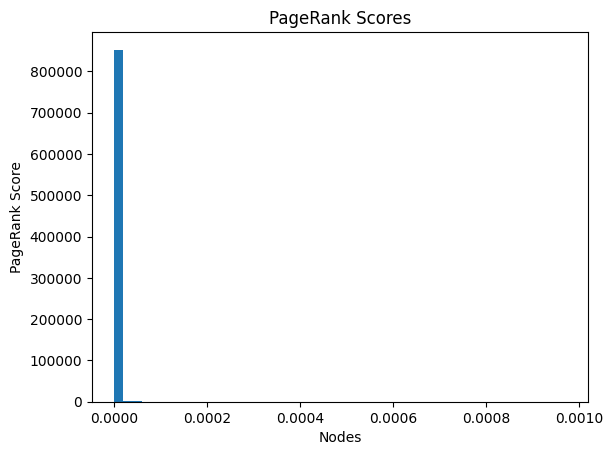

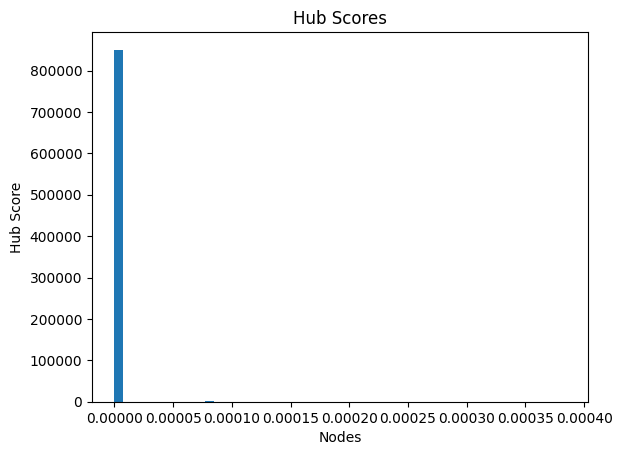

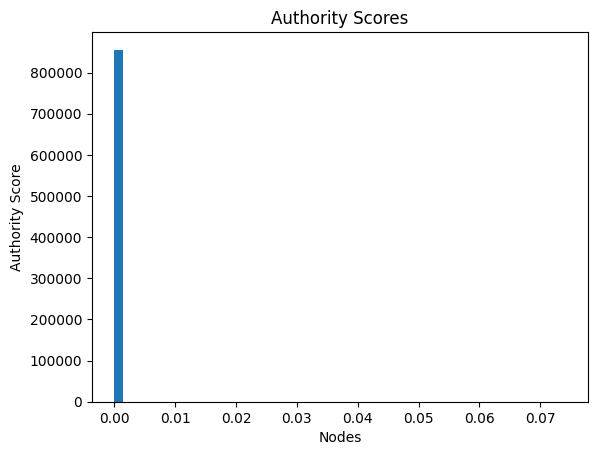

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Figure size 640x480 with 0 Axes>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

cnt = 1
with open(data_file , 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line[0] == '#':
            continue

        line = str(line)

        words = line.split('\t')

        if len(words) > 1:
            firstNode = words[0]
            secondNode = words[1]

            firstNode = firstNode.replace('\n' , '')
            secondNode = secondNode.replace('\n' , '')
            # print(f"FirstNode: {firstNode} \n SecondNode: {secondNode}")

        # print('------------------')

        cnt += 1

        G.add_edge(firstNode , secondNode , weight = 1)

max_subgraph = None
max_nodes = 0


# Find the weakly connected component subgraphs
# Find the weakly connected components
weakly_connected_components = nx.weakly_connected_components(G)

# Find the largest weakly connected component
largest_component = max(weakly_connected_components, key=len)

# Create a subgraph of the largest component
largest_component_subgraph = G.subgraph(largest_component)

# Print the nodes of the largest weakly connected component
# print(largest_component_subgraph.nodes())

# print('**********************************************')

# print(max_subgraph.nodes())

print('***********************************************')

print(f'len of nodes of largest_component_subgraph : {len(largest_component_subgraph.nodes())}\n')

print(f'len of edges of largest_component_subgraph : {len(largest_component_subgraph.edges())} \n')
# for each in max_subgraph.edges():
#     print(each)

print('*********************************************')

# print(max_nodes)
# largest = max(nx.weakly_connected_components(G) , key=len)
# print(largest.nodes())
# print(largest.edges())

# Second part of this # QUESTION: 2
# Calculate the PageRank scores
pagerank_scores = nx.pagerank(largest_component_subgraph)

# Draw the histogram diagram
plt.hist(list(pagerank_scores.values()) , bins = 50)
plt.xlabel('Nodes')
plt.ylabel('PageRank Score')
plt.title('PageRank Scores')
plt.show()
plt.savefig("pagerank.png")


# # Calculate the Hub and Authority scores
hub_scores, authority_scores = nx.hits(largest_component_subgraph)

# Draw the histogram diagram for Hub scores
plt.hist(list(hub_scores.values()), bins = 50)
plt.xlabel('Nodes')
plt.ylabel('Hub Score')
plt.title('Hub Scores')
plt.show()
plt.savefig("HubScores.png")

# Draw the histogram diagram for Authority scores
plt.hist(list(authority_scores.values() ), bins = 50)
plt.xlabel('Nodes')
plt.ylabel('Authority Score')
plt.title('Authority Scores')
plt.show()
plt.savefig("AuthorityScores.png")

# -----------------------------------------------------


# third part of this # QUESTION: 3
setA = set( pagerank_scores )
setB = set( hub_scores )
setC = set( authority_scores)

commonNodes_pageRank_hub = setA.intersection( setB )
commonNodes_pageRank_authority = setA.intersection( setC )
commonNodes_authority_hub = setB.intersection( setC )

print(f'Number of common nodes between PageRank and Hub : {commonNodes_pageRank_hub}')
print(f'Number of common nodes between PageRank and authority : {commonNodes_pageRank_authority}')
print(f'Number of common nodes between authority and Hub : {commonNodes_authority_hub}')


In [ ]:
from operator import itemgetter

nodes_without_outgoing_edge = list(node for node, out_degree in largest_component_subgraph.out_degree() if out_degree == 0)

nodes_without_ingoing_edge = list(node for node, in_degree in largest_component_subgraph.in_degree() if in_degree == 0)

print(f'length of nodes_without_outgoing_edge : {len(nodes_without_outgoing_edge)}')
print(f'length of nodes_without_ingoing_edge : {len(nodes_without_ingoing_edge)}')
# print(len(nodes_without_ingoing_edge))

N = 1000

# for key , val in sorted(pagerank_scores.items() , key = lambda x : x[1] , reverse=True)[:N]:

# nodes_top_100_pagerank  = sorted(pagerank_scores.items(), key = lambda x : x[1] , reverse=True)[:N]
# nodes_top_100_hub = sorted(hub_scores.items(), key = lambda x : x[1] , reverse=True)[:N]
# nodes_top_100_authority = sorted(authority_scores.items(), key = lambda x : x[1] , reverse=True)[:N]
# for each in nodes_without_ingoing_edge:
#   print(each)

length of nodes_without_outgoing_edge : 129587
length of nodes_without_ingoing_edge : 153225


# Finding Intersection of sets.

In [ ]:
nodes_without_outgoing_edge = list(node for node, out_degree in largest_component_subgraph.out_degree() if out_degree == 0)

nodes_without_ingoing_edge = list(node for node, in_degree in largest_component_subgraph.in_degree() if in_degree == 0)

# print(len(nodes_without_outgoing_edge))
# print(len(nodes_without_ingoing_edge))

N = 1000
nodes_top_1000_pagerank  = [] # sorted(pagerank_scores.items(), key=itemgetter(1), reverse=True)[:N]

nodes_top_1000_hub =[] # sorted(hub_scores.items(), key=itemgetter(1), reverse=True)[:N]
nodes_top_1000_authority = [] # sorted(authority_scores.items(), key=itemgetter(1), reverse=True)[:N]

for key , val in sorted(pagerank_scores.items() , key = lambda x : x[1] , reverse=True)[:N]:
  nodes_top_1000_pagerank.append(key)
  # print(f'key : {key} , value : {val}')


for key , val in sorted(hub_scores.items() , key = lambda x : x[1] , reverse=True)[:N]:
  nodes_top_1000_hub.append(key)

for key , val in sorted(authority_scores.items() , key = lambda x : x[1] , reverse=True)[:N]:
  nodes_top_1000_authority.append(key)

# for each in nodes_without_ingoing_edge:
#   print(each)

# $$$$$$$$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$$

setA = set( nodes_top_1000_pagerank )
setB = set( nodes_top_1000_hub )
setC = set( nodes_top_1000_authority )
setD = set( nodes_without_ingoing_edge )
setE = set( nodes_without_outgoing_edge )

commonNodes_pageRank_hub = setA.intersection( setB )
commonNodes_pageRank_authority = setA.intersection( setC )
commonNodes_pageRank_ingoing = setA.intersection( setD )
commonNodes_pageRank_outgoing = setA.intersection( setE )

commonNodes_hub_authority = setB.intersection( setC )
commonNodes_hub_ingoing = setB.intersection( setD )
commonNodes_hub_outgoing = setB.intersection( setE )

commonNodes_authority_ingoing = setC.intersection( setD )
commonNodes_authority_outgoing = setC.intersection( setE )

commonNodes_outgoing_ingoing = setD.intersection( setE )


print(f'Number of common nodes between PageRank and Hub : {len(commonNodes_pageRank_hub)}')
print(f'Number of common nodes between PageRank and authority : {len(commonNodes_pageRank_authority)}')
print(f'Number of common nodes between authority and Hub : {len(commonNodes_authority_hub)}')
print(f'Number of common nodes between PageRank and ingoing nodes : {len(commonNodes_pageRank_ingoing)}')

print('-----------------------------------------------------')

print(f'Number of common nodes between hub and authority : {len(commonNodes_authority_hub)}')
print(f'Number of common nodes between hub and ingoing nodes : {len(commonNodes_hub_ingoing)}')
print(f'Number of common nodes between hub and outgoing nodes : {len(commonNodes_hub_outgoing)}')

print('-----------------------------------------------------')

print(f'Number of common nodes between authority and ingoing nodes : {len(commonNodes_authority_ingoing)}')
print(f'Number of common nodes between authority and outgoing nodes : {len(commonNodes_authority_outgoing)}')

print('-----------------------------------------------------')

# print(f'Number of common nodes between ingoing nodes and outgoing nodes : {len(commonNodes_outgoing_ingoing)}')
# print(f'Number of common nodes between PageRank and Hub : {len(commonNodes_pageRank_hub)}')
# print(f'Number of common nodes between PageRank and authority : {len(commonNodes_pageRank_authority)}')
# print(f'Number of common nodes between authority and Hub : {len(commonNodes_authority_hub)}')



Number of common nodes between PageRank and Hub : 4
Number of common nodes between PageRank and authority : 77
Number of common nodes between authority and Hub : 855802
Number of common nodes between PageRank and ingoing nodes : 0
-----------------------------------------------------
Number of common nodes between hub and authority : 855802
Number of common nodes between hub and ingoing nodes : 695
Number of common nodes between hub and outgoing nodes : 0
-----------------------------------------------------
Number of common nodes between authority and ingoing nodes : 0
Number of common nodes between authority and outgoing nodes : 15
-----------------------------------------------------


In [ ]:
N = 1000

pr_02 = nx.pagerank(largest_component_subgraph , alpha=0.2)
nodes_pr_02 = []

for key , val in sorted(pr_02.items() , key = lambda x : x[1] , reverse=True)[:N]:
  nodes_pr_02.append(key)

pr_04 = nx.pagerank(largest_component_subgraph , alpha=0.4)
nodes_pr_04 = []

for key , val in sorted(pr_04.items() , key = lambda x : x[1] , reverse = True)[:N]:
  nodes_pr_04.append(key)



pr_05 = nx.pagerank(largest_component_subgraph , alpha=0.5)
nodes_pr_05 = []

for key , val in sorted(pr_05.items() , key = lambda x : x[1] , reverse = True)[:N]:
  nodes_pr_05.append(key)


pr_06 = nx.pagerank(largest_component_subgraph , alpha=0.6)
nodes_pr_06 = []

for key , val in sorted(pr_06.items() , key = lambda x : x[1] , reverse = True)[:N]:
  nodes_pr_06.append(key)



pr_08 = nx.pagerank(largest_component_subgraph , alpha=0.8)
nodes_pr_08 = []

for key , val in sorted(pr_08.items() , key = lambda x : x[1] , reverse = True)[:N]:
  nodes_pr_08.append(key)

In [ ]:
set1 = set( nodes_pr_02 )
set2 = set( nodes_pr_04 )
set3 = set( nodes_pr_05 )
set4 = set( nodes_pr_06 )
set5 = set( nodes_pr_08 )
setAuthority = set(nodes_top_1000_authority)
setHub = set(nodes_top_1000_hub)

commonNodes_authority_02 = set1.intersection(setAuthority)
commonNodes_authority_04 = set2.intersection(setAuthority)
commonNodes_authority_05 = set3.intersection(setAuthority)
commonNodes_authority_06 = set4.intersection(setAuthority)
commonNodes_authority_08 = set5.intersection(setAuthority)

commonNodes_hub_02 = set1.intersection(setHub)
commonNodes_hub_04 = set2.intersection(setHub)
commonNodes_hub_05 = set3.intersection(setHub)
commonNodes_hub_06 = set4.intersection(setHub)
commonNodes_hub_08 = set5.intersection(setHub)

print(f'common Nodes between Authority and PageRank(0.2) : {len(commonNodes_authority_02)}')
print(f'common Nodes between Authority and PageRank(0.4) : {len(commonNodes_authority_04)}')
print(f'common Nodes between Authority and PageRank(0.5) : {len(commonNodes_authority_05)}')
print(f'common Nodes between Authority and PageRank(0.6) : {len(commonNodes_authority_06)}')
print(f'common Nodes between Authority and PageRank(0.8) : {len(commonNodes_authority_08)}')

print(f'common Nodes between Hub and PageRank(0.2) : {len(commonNodes_hub_02)}')
print(f'common Nodes between Hub and PageRank(0.4) : {len(commonNodes_hub_04)}')
print(f'common Nodes between Hub and PageRank(0.5) : {len(commonNodes_hub_05)}')
print(f'common Nodes between Hub and PageRank(0.6) : {len(commonNodes_hub_06)}')
print(f'common Nodes between Hub and PageRank(0.8) : {len(commonNodes_hub_08)}')

common Nodes between Authority and PageRank(0.2) : 64
common Nodes between Authority and PageRank(0.4) : 64
common Nodes between Authority and PageRank(0.5) : 64
common Nodes between Authority and PageRank(0.6) : 64
common Nodes between Authority and PageRank(0.8) : 64
common Nodes between Hub and PageRank(0.2) : 2
common Nodes between Hub and PageRank(0.4) : 2
common Nodes between Hub and PageRank(0.5) : 2
common Nodes between Hub and PageRank(0.6) : 2
common Nodes between Hub and PageRank(0.8) : 2


In [ ]:
footballers_goals = {'Eusebio': 120, 'Cruyff': 104, 'Pele': 150, 'Ronaldo': 132, 'Messi': 125}

sorted_footballers_by_goals = sorted(footballers_goals.items(), key=lambda x:x[1] , reverse = True)[:3]
print(sorted_footballers_by_goals)

[('Pele', 150), ('Ronaldo', 132), ('Messi', 125)]
